In [1]:
#from shapely.geometry import Point
import seaborn as sns
import numpy as np
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
import bokeh
#from collections import Counter
#from folium.plugins import MarkerCluster
#from folium.plugins import FastMarkerCluster

world = gpd.read_file('custom.geo.json')
print(world.crs)
world.head( )

In [2]:
warheads=pd.read_csv('nuclear_warheads.csv')
warheads

Year United States Russia  United Kingdom  France  China  Israel  India  \
0   1945             2    NaN             NaN     NaN    NaN     NaN    NaN   
1   1946             9    NaN             NaN     NaN    NaN     NaN    NaN   
2   1947            13    NaN             NaN     NaN    NaN     NaN    NaN   
3   1948            50    NaN             NaN     NaN    NaN     NaN    NaN   
4   1949           170      1             NaN     NaN    NaN     NaN    NaN   
..   ...           ...    ...             ...     ...    ...     ...    ...   
71  2016         4,018  4,490           215.0   300.0  260.0    80.0  120.0   
72  2017         4,000  4,300           215.0   300.0  270.0    80.0  130.0   
73  2018         4,000  4,350           215.0   300.0  280.0    80.0  135.0   
74  2019         3,800  4,490           215.0   300.0  290.0    85.0  140.0   
75  2020         3,800  4,310           195.0   290.0  320.0    90.0  150.0   

    Pakistan  North Korea  Unnamed: 10  
0        NaN          NaN          NaN  
1        NaN          NaN          NaN  
2        NaN          NaN          NaN  
3        NaN          NaN          NaN  
4        NaN          NaN          NaN  
..       ...          ...          ...  
71     130.0          4.0          NaN  
72     140.0          5.0          NaN  
73     145.0         10.0          NaN  
74     150.0         15.0          NaN  
75     160.0         35.0          NaN  

[76 rows x 11 columns]

In [32]:
tests=pd.read_csv('nuclear_weapon_explosions_1945-1998.csv')
tests

Unnamed: 0  latitude  longitude  depth   mb name    source Country  \
0              1    41.500     88.500    0.0  NaN    -      BOLT   China   
1              2    41.500     88.500    0.0  NaN    -      BOLT   China   
2              3    41.500     88.500    0.0  NaN    -      BOLT   China   
3              4    41.500     88.500    0.0  NaN    -      NRDC   China   
4              5    41.500     88.500    0.0  NaN    -      NRDC   China   
...          ...       ...        ...    ...  ...  ...       ...     ...   
2036        2037    49.869     78.775    0.0  5.6    -   AWE-JED  Russia   
2037        2038    50.019     78.998    0.0  5.1    -   AWE-JED  Russia   
2038        2039    49.751     78.005    0.0  4.7    -   AWE-JED  Russia   
2039        2040    49.927     78.927    0.0  6.0    -   AWE-JED  Russia   
2040        2041    73.331     54.757    0.0  5.7    -  RICHARDS  Russia   

                   datetime  max_yield       medium confirmation  salvo  
0     10/16/1964 7:00:00 AM       20.0          Air     presumed      0  
1      5/14/1965 2:00:00 AM       20.0          Air     presumed      0  
2       5/9/1966 8:00:00 AM      200.0          Air     presumed      0  
3     10/27/1966 1:10:00 AM        0.0          Air      unknown      0  
4     12/28/1966 4:00:00 AM        0.0          Air      unknown      0  
...                     ...        ...          ...          ...    ...  
2036    7/8/1989 3:47:00 AM      150.0  Underground    confirmed      0  
2037    9/2/1989 4:17:00 AM       40.0          Air    confirmed      1  
2038  10/4/1989 11:30:00 AM       20.0  Underground    confirmed      0  
2039  10/19/1989 9:50:00 AM      190.0          Air    confirmed      1  
2040  10/24/1990 2:57:59 PM      230.0          Air    confirmed      1  

[2041 rows x 13 columns]

In [4]:
oops=pd.read_csv('NuclearPowerAccidents2016.csv')
oops_ord=oops.sort_values(by=['Fatalities'], ascending=False)
oops_ord

Date                            Location  Cost (millions 2013US$)  \
0     4/26/1986                       Kiev, Ukraine                 259336.0   
1     3/11/2011         Fukushima Prefecture, Japan                 166089.0   
12    9/29/1957  Kyshtym, Chelyabinsk, Soviet Union                   1733.4   
56    10/8/1957           Windscale, United Kingdom                     89.9   
124    8/9/2004             Fukui Prefecture, Japan                     10.7   
..          ...                                 ...                      ...   
77    8/23/2011    Mineral, Virginia, United States                     48.2   
78    6/16/2005  Braidwood, Illinois, United States                     47.1   
79    11/1/1983                      Sellafield, UK                     44.0   
80     9/5/1996    Clinton, Illinois, United States                     43.9   
215  08/02/1992                   Pickering, Canada                      NaN   

     INES  Smyth Magnitude Region  \
0     7.0              8.0     EE   
1     7.0              7.5      A   
12    6.0              7.3     EE   
56    5.0              4.6     WE   
124   1.0              NaN      A   
..    ...              ...    ...   
77    NaN              NaN    NaN   
78    NaN              NaN    NaN   
79    3.0              NaN     WE   
80    NaN              NaN    NaN   
215   NaN              NaN    NaN   

                                           Description  Fatalities  
0    Mishandled reactor safety test at Chernobyl nu...        4056  
1    An earthquake and tsunami caused emergency bac...         573  
12   Heat exchangers failed at nitrate storage tank...         103  
56   Fire ignited plutonium piles, created radioact...          33  
124  Steam explosion at Mihama Nuclear Power Plant ...           5  
..                                                 ...         ...  
77   A magnitude 5.8 earthquake damaged Dominion En...           0  
78   Exelon’s Braidwood nuclear station leaked trit...           0  
79   Inadvertent transfer of 59 TBq activity with s...           0  
80   Reactor recirculation pump failed and required...           0  
215  Pickering reactor 4 had a heavy water leak fro...           0  

[216 rows x 8 columns]

In [5]:
oops['Date']=pd.to_datetime(oops['Date'])
oops_g=oops.groupby([date.year for date in oops['Date']]).count()
oops_g=oops_g.reset_index()

oops_g

index  Date  Location  Cost (millions 2013US$)  INES  Smyth Magnitude  \
0    1946     1         1                        1     0                0   
1    1949     1         1                        1     1                1   
2    1952     1         1                        1     0                0   
3    1955     4         4                        4     4                3   
4    1957     3         3                        3     3                3   
5    1958     4         4                        4     2                0   
6    1959     1         1                        1     1                0   
7    1960     1         1                        1     1                0   
8    1961     2         2                        2     2                2   
9    1964     1         1                        1     1                0   
10   1965     1         1                        1     1                1   
11   1966     1         1                        1     1                0   
12   1967     2         2                        2     2                0   
13   1968     2         2                        2     2                2   
14   1969     6         6                        6     5                3   
15   1970     4         4                        4     4                4   
16   1971     4         4                        4     3                2   
17   1972     3         3                        3     2                1   
18   1973     2         2                        2     1                1   
19   1974     1         1                        1     0                0   
20   1975     5         5                        5     3                0   
21   1976     1         1                        1     0                0   
22   1977     3         3                        3     2                0   
23   1978     1         1                        0     0                0   
24   1979     7         7                        7     4                3   
25   1980     4         4                        4     2                1   
26   1981     4         4                        4     2                1   
27   1982     5         5                        5     1                0   
28   1983    10        10                       10     2                0   
29   1984     5         5                        5     1                1   
30   1985     6         6                        6     0                0   
31   1986     6         6                        6     1                1   
32   1987     4         4                        4     1                0   
33   1988     7         7                        4     2                0   
34   1989     6         6                        6     1                0   
35   1990     1         1                        0     0                0   
36   1991     3         3                        1     0                0   
37   1992     4         4                        2     1                0   
38   1993     6         6                        6     1                1   
39   1995     4         4                        4     0                0   
40   1996     5         5                        4     0                0   
41   1997     3         3                        2     1                0   
42   1999     5         5                        5     3                0   
43   2001     3         3                        0     2                0   
44   2002     5         5                        4     2                0   
45   2003     3         3                        2     2                1   
46   2004     2         2                        2     2                0   
47   2005     5         5                        4     3                0   
48   2006     4         4                        3     1                0   
49   2007     1         1                        1     0                0   
50   2008     5         5                        4     2                0   


[Text(0, 0, '1946'),
 Text(1, 0, '1949'),
 Text(2, 0, '1952'),
 Text(3, 0, '1955'),
 Text(4, 0, '1957'),
 Text(5, 0, '1958'),
 Text(6, 0, '1959'),
 Text(7, 0, '1960'),
 Text(8, 0, '1961'),
 Text(9, 0, '1964'),
 Text(10, 0, '1965'),
 Text(11, 0, '1966'),
 Text(12, 0, '1967'),
 Text(13, 0, '1968'),
 Text(14, 0, '1969'),
 Text(15, 0, '1970'),
 Text(16, 0, '1971'),
 Text(17, 0, '1972'),
 Text(18, 0, '1973'),
 Text(19, 0, '1974'),
 Text(20, 0, '1975'),
 Text(21, 0, '1976'),
 Text(22, 0, '1977'),
 Text(23, 0, '1978'),
 Text(24, 0, '1979'),
 Text(25, 0, '1980'),
 Text(26, 0, '1981'),
 Text(27, 0, '1982'),
 Text(28, 0, '1983'),
 Text(29, 0, '1984'),
 Text(30, 0, '1985'),
 Text(31, 0, '1986'),
 Text(32, 0, '1987'),
 Text(33, 0, '1988'),
 Text(34, 0, '1989'),
 Text(35, 0, '1990'),
 Text(36, 0, '1991'),
 Text(37, 0, '1992'),
 Text(38, 0, '1993'),
 Text(39, 0, '1995'),
 Text(40, 0, '1996'),
 Text(41, 0, '1997'),
 Text(42, 0, '1999'),
 Text(43, 0, '2001'),
 Text(44, 0, '2002'),
 Text(45, 0, '2003')

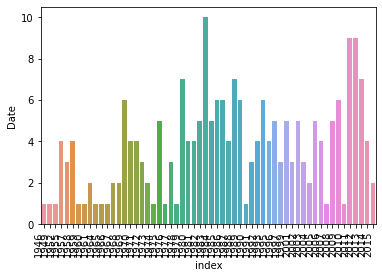

In [6]:
#seaborn.barplot(x=oops_g.date.value_counts().index, y=oops.date.value_counts())
g=sns.barplot(data=oops_g, x="index", y="Date", linewidth=1.5)
mpl.rcParams['figure.figsize'] = 15,10
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

In [7]:
#oops['Date']=oops.to_datetime(oops['Date'])
oops['Date']=pd.DatetimeIndex(oops['Date']).year
#oops['year'] = oops['Date'].to_period('Y')
oops_n=oops[['Date', 'Fatalities']]
oops_x=oops_n.groupby(['Date']).sum()
oops_x=oops_x.reset_index()

#oops_x["yr_x_sum"] = oops.groupby([date.year for date in oops['Date']])["Fatalities"].transform(sum)

oops_x.head(10)
#oops

Date  Fatalities
0  1946           1
1  1949           0
2  1952           0
3  1955           0
4  1957         136
5  1958           5
6  1959           0
7  1960           0
8  1961           3
9  1964           1

[Text(0, 0, '1946'),
 Text(1, 0, '1949'),
 Text(2, 0, '1952'),
 Text(3, 0, '1955'),
 Text(4, 0, '1957'),
 Text(5, 0, '1958'),
 Text(6, 0, '1959'),
 Text(7, 0, '1960'),
 Text(8, 0, '1961'),
 Text(9, 0, '1964'),
 Text(10, 0, '1965'),
 Text(11, 0, '1966'),
 Text(12, 0, '1967'),
 Text(13, 0, '1968'),
 Text(14, 0, '1969'),
 Text(15, 0, '1970'),
 Text(16, 0, '1971'),
 Text(17, 0, '1972'),
 Text(18, 0, '1973'),
 Text(19, 0, '1974'),
 Text(20, 0, '1975'),
 Text(21, 0, '1976'),
 Text(22, 0, '1977'),
 Text(23, 0, '1978'),
 Text(24, 0, '1979'),
 Text(25, 0, '1980'),
 Text(26, 0, '1981'),
 Text(27, 0, '1982'),
 Text(28, 0, '1983'),
 Text(29, 0, '1984'),
 Text(30, 0, '1985'),
 Text(31, 0, '1986'),
 Text(32, 0, '1987'),
 Text(33, 0, '1988'),
 Text(34, 0, '1989'),
 Text(35, 0, '1990'),
 Text(36, 0, '1991'),
 Text(37, 0, '1992'),
 Text(38, 0, '1993'),
 Text(39, 0, '1995'),
 Text(40, 0, '1996'),
 Text(41, 0, '1997'),
 Text(42, 0, '1999'),
 Text(43, 0, '2001'),
 Text(44, 0, '2002'),
 Text(45, 0, '2003')

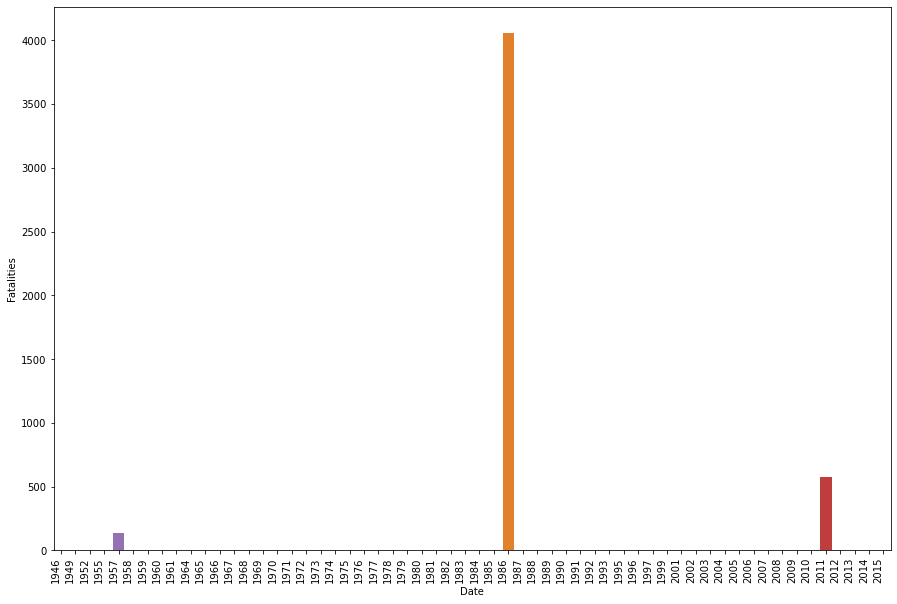

In [8]:
g=sns.barplot(data=oops_x, x="Date", y="Fatalities", palette='tab10', linewidth=1.5)
mpl.rcParams['figure.figsize'] = 15,10
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

In [11]:
deaths_by_energy=pd.read_csv('death-rates-from-energy-production-per-twh.csv')
deaths_by_energy

Entity  Code  Year  \
0    Biofuels   NaN  2014   
1     Biomass   NaN  2014   
2  Brown coal   NaN  2014   
3        Coal   NaN  2014   
4         Gas   NaN  2014   
5  Hydropower   NaN  2014   
6     Nuclear   NaN  2014   
7         Oil   NaN  2014   
8       Solar   NaN  2014   
9        Wind   NaN  2014   

   Deaths per TWh (Markandya & Wilkinson; Sovacool et al.)  
0                                             0.0048        
1                                             4.6300        
2                                            32.7200        
3                                            24.6200        
4                                             2.8210        
5                                             0.0235        
6                                             0.0710        
7                                            18.4300        
8                                             0.0190        
9                                             0.0350

In [18]:
pd.set_option('display.max_colwidth', None)
emotions=pd.read_csv('emotions.csv') 
emotions.head(10)

tweet_text  \
0                                                                                  :Hello Japan is a nuclear power plant crisis. {link}   
1                                          . Renewable Energy Consumption Tops Nuclear for FirstTime {link} is nuclear energy renewable   
2                                        . Will liberals now seek to eliminate dangerous nuclear power plants? {link} green energy news   
3                    (Aug 22,2011)Plant Status of Fukushima Daiichi Nuclear Power Station (as of 3:00 pm, Aug. 22) {link} #tepco #japan   
4            [ebook] Nuclear Energy and the Environment: Oxf ord Un iversity Pr ess | 2011 | ISBN: 0841225850 | 432 pages | P... {link}   
5                    [GJOBS] Nuclear Power Safety Campaign Organizer - Temporary / Union of Concerned Scientists / Cambridge, MA {link}   
6                                                  [news] Nuclear Power Plant: Radioactive Tritium Contamination in Vermont {link} #nwo   
7            [science] Nuclear Energy and the Environment: Oxf ord Un iversity Pr ess | 2011 | ISBN: 0841225850 | 432 pages |... {link}   
8                  {link} :P How many windmills would you need to produce as much power as one average nuclear power station? windmills   
9  {link} &quot;The right thing to do&quot; I'm for nuclear energy, when done correctly. But this plant was built to a 1970's standard.   

                                      sentiment  \
0                                      Negative   
1  Neutral / author is just sharing information   
2  Neutral / author is just sharing information   
3  Neutral / author is just sharing information   
4  Neutral / author is just sharing information   
5  Neutral / author is just sharing information   
6  Neutral / author is just sharing information   
7  Neutral / author is just sharing information   
8  Neutral / author is just sharing information   
9                                      Positive   

                                                              sentiment_confidence_summary  
0                   "Neutral / author is just sharing information": 0.2\n"Negative": 0.8\n  
1                                    "Neutral / author is just sharing information": 1.0\n  
2               "Neutral / author is just sharing information": 0.667\n"Negative": 0.333\n  
3                                    "Neutral / author is just sharing information": 1.0\n  
4                                    "Neutral / author is just sharing information": 1.0\n  
5                                    "Neutral / author is just sharing information": 1.0\n  
6               "Neutral / author is just sharing information": 0.857\n"Negative": 0.143\n  
7                                    "Neutral / author is just sharing information": 1.0\n  
8                                    "Neutral / author is just sharing information": 1.0\n  
9  "Neutral / author is just sharing information": 0.2\n"Positive": 0.6\n"Negative": 0.2\n

In [36]:
nuc_perc=pd.read_csv('nuclear-primary-energy.csv') 
nuc_perc.head(40)

Entity Code  Year  Nuclear (% sub energy)
0   Africa  NaN  1965                   0.000
1   Africa  NaN  1966                   0.000
2   Africa  NaN  1967                   0.000
3   Africa  NaN  1968                   0.000
4   Africa  NaN  1969                   0.000
5   Africa  NaN  1970                   0.000
6   Africa  NaN  1971                   0.000
7   Africa  NaN  1972                   0.000
8   Africa  NaN  1973                   0.000
9   Africa  NaN  1974                   0.000
10  Africa  NaN  1975                   0.000
11  Africa  NaN  1976                   0.000
12  Africa  NaN  1977                   0.000
13  Africa  NaN  1978                   0.000
14  Africa  NaN  1979                   0.000
15  Africa  NaN  1980                   0.000
16  Africa  NaN  1981                   0.000
17  Africa  NaN  1982                   0.000
18  Africa  NaN  1983                   0.000
19  Africa  NaN  1984                   0.509
20  Africa  NaN  1985                   0.664
21  Africa  NaN  1986                   1.074
22  Africa  NaN  1987                   0.730
23  Africa  NaN  1988                   1.158
24  Africa  NaN  1989                   1.221
25  Africa  NaN  1990                   0.900
26  Africa  NaN  1991                   0.975
27  Africa  NaN  1992                   0.974
28  Africa  NaN  1993                   0.758
29  Africa  NaN  1994                   0.984
30  Africa  NaN  1995                   1.102
31  Africa  NaN  1996                   1.118
32  Africa  NaN  1997                   1.179
33  Africa  NaN  1998                   1.248
34  Africa  NaN  1999                   1.143
35  Africa  NaN  2000                   1.132
36  Africa  NaN  2001                   0.892
37  Africa  NaN  2002                   0.980
38  Africa  NaN  2003                   0.982
39  Africa  NaN  2004                   0.961

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
savior=pd.read_csv('energy-consumption.csv') 
savior['Nuclear_Energy_saved']=round(savior['Nuclear Consumption - EJ']*19.6475, 2)

savior

<ipython-input-51-21d07f744fd2>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Entity      Code  Year  Oil Consumption - EJ  \
0     Africa                        NaN       1965  325.900637             
1     Africa                        NaN       1966  356.709630             
2     Africa                        NaN       1967  353.833321             
3     Africa                        NaN       1968  373.394345             
4     Africa                        NaN       1969  378.536268             
5     Africa                        NaN       1970  418.406964             
6     Africa                        NaN       1971  473.040837             
7     Africa                        NaN       1972  512.727266             
8     Africa                        NaN       1973  551.441375             
9     Africa                        NaN       1974  570.029427             
10    Africa                        NaN       1975  596.424561             
11    Africa                        NaN       1976  662.209662             
12    Africa                        NaN       1977  701.104634             
13    Africa                        NaN       1978  738.154265             
14    Africa                        NaN       1979  787.131889             
15    Africa                        NaN       1980  832.875735             
16    Africa                        NaN       1981  886.377996             
17    Africa                        NaN       1982  930.540533             
18    Africa                        NaN       1983  962.147472             
19    Africa                        NaN       1984  982.638326             
20    Africa                        NaN       1985  1004.732065            
21    Africa                        NaN       1986  989.846707             
22    Africa                        NaN       1987  1039.889410            
23    Africa                        NaN       1988  1088.385227            
24    Africa                        NaN       1989  1128.545317            
25    Africa                        NaN       1990  1146.369270            
26    Africa                        NaN       1991  1154.305746            
27    Africa                        NaN       1992  1180.937642            
28    Africa                        NaN       1993  1194.689318            
29    Africa                        NaN       1994  1222.243952            
30    Africa                        NaN       1995  1264.993981            
31    Africa                        NaN       1996  1296.461667            
32    Africa                        NaN       1997  1331.621451            
33    Africa                        NaN       1998  1363.818221            
34    Africa                        NaN       1999  1412.794530            
35    Africa                        NaN       2000  1420.643833            
36    Africa                        NaN       2001  1438.969439            
37    Africa                        NaN       2002  1465.110139            
38    Africa                        NaN       2003  1504.262012            
39    Africa                        NaN       2004  1575.878087            
40    Africa                        NaN       2005  1655.326461            
41    Africa                        NaN       2006  1666.699449            
42    Africa                        NaN       2007  1722.461698            
43    Africa                        NaN       2008  1819.186532            
44    Africa                        NaN       2009  1885.540243            
45    Africa                        NaN       2010  1979.924263            
46    Africa                        NaN       2011  1926.235447            
47    Africa                        NaN       2012  2031.104403            
48    Africa                        NaN       2013  2103.639425            
49    Africa                        NaN       2014  2138.874361            
50    Africa                        NaN       2015  2187.326884            
51    Africa                        NaN       2016  2206.988723            


In [38]:
deaths_by_energy 

Entity  Code  Year  \
0    Biofuels   NaN  2014   
1     Biomass   NaN  2014   
2  Brown coal   NaN  2014   
3        Coal   NaN  2014   
4         Gas   NaN  2014   
5  Hydropower   NaN  2014   
6     Nuclear   NaN  2014   
7         Oil   NaN  2014   
8       Solar   NaN  2014   
9        Wind   NaN  2014   

   Deaths per TWh (Markandya & Wilkinson; Sovacool et al.)  
0                                                   0.0048  
1                                                   4.6300  
2                                                  32.7200  
3                                                  24.6200  
4                                                   2.8210  
5                                                   0.0235  
6                                                   0.0710  
7                                                  18.4300  
8                                                   0.0190  
9                                                   0.0350

In [49]:
(32.72+24.62+18.43+2.82)/4

19.6475

In [56]:
round(savior['Nuclear_Energy_saved'].sum(), 2)

14743815.49

In [16]:
field=pd.read_csv('FieldMeasurements_5.csv')
field['geometry'] = field.apply(lambda x: Point((float(x.Longitude), 
                                                         float(x.Latitude))), 
                                        axis=1)
field_geo = gpd.GeoDataFrame(field, 
                           crs = world.crs, 
                           geometry = field['geometry'])

NameError: name 'Point' is not defined

In [ ]:
field_geo.geometry.centroid
f_center = field_geo.geometry.centroid[42]
f_area_center = [f_center.y, f_center.x]
#GeoSeries.to_crs()
field_map = folium.Map(location =  f_area_center, zoom_start = 12)
field_map

In [ ]:
i = 0
for row_index, row_values in field_geo.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

In [ ]:
#draw our zip code area: 37207
#readings_map = folium.Map(location =  f_area_center, zoom_start = 12)

#folium.GeoJson(field_geo).add_to(readings_map)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

#for row_index, row_values in field_geo.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Type'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(readings_map)
#world_plants.save('../maps/map37207.html')

#display our map